In [1]:
from notebook.services.config import ConfigManager
c = ConfigManager()
c.update('notebook', {"CodeCell": {"cm_config": {"autoCloseBrackets": False}}})

{'CodeCell': {'cm_config': {'autoCloseBrackets': False}}}

In [2]:
import pandas as pd

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
#from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [4]:
from sklearn.model_selection import KFold

In [5]:
import numpy as np

In [61]:
from sklearn.dummy import DummyRegressor

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-и-заполнение-пропусков" data-toc-modified-id="Загрузка-и-заполнение-пропусков-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка и заполнение пропусков</a></span></li><li><span><a href="#Эффективность-обогащения" data-toc-modified-id="Эффективность-обогащения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Эффективность обогащения</a></span></li><li><span><a href="#Анализ-недоступных-в-тестовой-выборке-параметров" data-toc-modified-id="Анализ-недоступных-в-тестовой-выборке-параметров-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ недоступных в тестовой выборке параметров</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-концентраций-металлов" data-toc-modified-id="Изменение-концентраций-металлов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменение концентраций металлов</a></span></li><li><span><a href="#Сравнение-распределения-размеров-гранул-сырья" data-toc-modified-id="Сравнение-распределения-размеров-гранул-сырья-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравнение распределения размеров гранул сырья</a></span></li><li><span><a href="#Суммарная-концентрация" data-toc-modified-id="Суммарная-концентрация-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Суммарная концентрация</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-SMAPE-и-подготовка" data-toc-modified-id="Функция-SMAPE-и-подготовка-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция SMAPE и подготовка</a></span></li><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Ближайшие-соседи" data-toc-modified-id="Ближайшие-соседи-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Ближайшие соседи</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Проверка-на-тестовой-выборке" data-toc-modified-id="Проверка-на-тестовой-выборке-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Проверка на тестовой выборке</a></span></li><li><span><a href="#Оценка-модели" data-toc-modified-id="Оценка-модели-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Оценка модели</a></span></li><li><span><a href="#Итоговая-модель" data-toc-modified-id="Итоговая-модель-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Итоговая модель</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

### Загрузка и заполнение пропусков

In [6]:
train = pd.read_csv('/datasets/gold_recovery_train_new.csv', parse_dates=['date'])
test = pd.read_csv('/datasets/gold_recovery_test_new.csv', parse_dates=['date'])
full = pd.read_csv('/datasets/gold_recovery_full_new.csv', parse_dates=['date'])

In [7]:
train

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14144,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
14145,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
14146,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
14147,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [8]:
test

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5285,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5286,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5287,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5288,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


In [9]:
full

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19434,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
19435,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
19436,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
19437,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [10]:
full.columns

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

In [11]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
date                                                  19439 non-null datetime64[ns]
final.output.concentrate_ag                           19438 non-null float64
final.output.concentrate_pb                           19438 non-null float64
final.output.concentrate_sol                          19228 non-null float64
final.output.concentrate_au                           19439 non-null float64
final.output.recovery                                 19439 non-null float64
final.output.tail_ag                                  19438 non-null float64
final.output.tail_pb                                  19338 non-null float64
final.output.tail_sol                                 19433 non-null float64
final.output.tail_au                                  19439 non-null float64
primary_cleaner.input.sulfate                         19415 non-null float64
primary_cleaner.input.depressant     

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>и есть первичный осмотр)

In [12]:
full[pd.isna(full['final.output.concentrate_ag'])]

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
2869,2016-06-08 17:59:59,NaN,NaN,10.188231,29.020814,63.725335,7.387115,2.072266,16.982505,2.908215,...,8.985634,-548.815307,7.011665,-537.231749,8.031238,-550.028193,5.984399,-549.63625,18.01224,-551.325271


In [13]:
full['final.output.concentrate_ag'].describe()

count    19438.000000
mean         5.168470
std          1.372348
min          0.000000
25%          4.251240
50%          5.066094
75%          5.895527
max         16.001945
Name: final.output.concentrate_ag, dtype: float64

Возможно, что пропуски можно заполнить какой-нибудь линейной зависимостью.

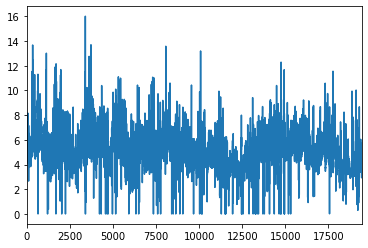

In [14]:
full['final.output.concentrate_ag'].plot()

Скорее всего, поскольку имеем непрерывный процесс, вполне можно заполнить недостающие значения линейной интерполяцией.

In [15]:
full.interpolate(method='linear', inplace=True, limit_direction="both")

In [16]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
date                                                  19439 non-null datetime64[ns]
final.output.concentrate_ag                           19439 non-null float64
final.output.concentrate_pb                           19439 non-null float64
final.output.concentrate_sol                          19439 non-null float64
final.output.concentrate_au                           19439 non-null float64
final.output.recovery                                 19439 non-null float64
final.output.tail_ag                                  19439 non-null float64
final.output.tail_pb                                  19439 non-null float64
final.output.tail_sol                                 19439 non-null float64
final.output.tail_au                                  19439 non-null float64
primary_cleaner.input.sulfate                         19439 non-null float64
primary_cleaner.input.depressant     

In [17]:
test_columns = test.columns

In [18]:
test = full[full['date'].isin(test['date'])].reset_index(drop=True)
train = full[full['date'].isin(train['date'])].reset_index(drop=True)

In [19]:
train

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14144,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
14145,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
14146,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
14147,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


Данные заполнены.

### Эффективность обогащения

In [20]:
train['rougher.output.recovery']

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Name: rougher.output.recovery, Length: 14149, dtype: float64

In [21]:
train['rougher.output.recovery'].describe()

count    14149.000000
mean        82.704502
std         14.479156
min          0.000000
25%         79.993067
50%         85.299462
75%         90.165021
max        100.000000
Name: rougher.output.recovery, dtype: float64

Рассчёт эффективности обогащения по формуле

In [22]:
c = train['rougher.output.concentrate_au']
f = train['rougher.input.feed_au']
t = train['rougher.output.tail_au']

In [23]:
rougher_output_recovery = (c*(f-t))/(f*(c-t))*100

In [24]:
rougher_output_recovery

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Length: 14149, dtype: float64

In [25]:
mean_absolute_error(rougher_output_recovery,train['rougher.output.recovery'])

9.51240405736647e-15

Абсолютная ошибка близка к погрешности вычисления компьютера, значит эффективность обогащения рассчитана правильно, то есть пропуска заполнены либо правильно, по крайней мере, не испортят вычисления.

### Анализ недоступных в тестовой выборке параметров

In [26]:
absent = []
for a in train.columns:
    if a not in test_columns:
        absent.append(a)
        print(a)

final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.concentrate_au
final.output.recovery
final.output.tail_ag
final.output.tail_pb
final.output.tail_sol
final.output.tail_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.concentrate_au
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
primary_cleaner.output.tail_au
rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.concentrate_au
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_pb
rougher.output.tail_sol
rougher.output.tail_au
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_pb
secondary_cleaner.

В тестовой выборке нет данных по концентратам и отвальным хвостам после флотации, при первичной очистке, вторичной очистке и после них, а также соотношения реагентов к золоту при флотации.
<br>
<br>
У всех параметров тип — float.

In [27]:
train['rougher.calculation.au_pb_ratio']

0        2.838687
1        2.858998
2        2.945989
3        3.002340
4        3.169615
           ...   
14144    1.155559
14145    1.167342
14146    1.125637
14147    1.117935
14148    1.126367
Name: rougher.calculation.au_pb_ratio, Length: 14149, dtype: float64

## Анализ данных

### Изменение концентраций металлов

In [28]:
metals = ['au','ag','pb']
stages = ['rougher.input.feed_','rougher.output.concentrate_','primary_cleaner.output.concentrate_','final.output.concentrate_']

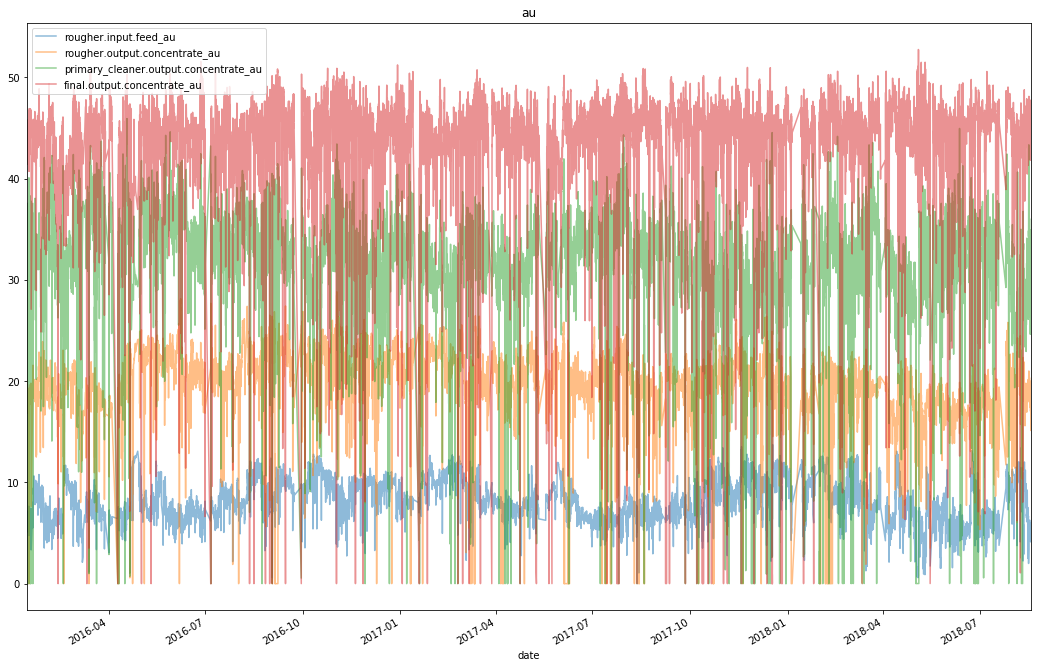

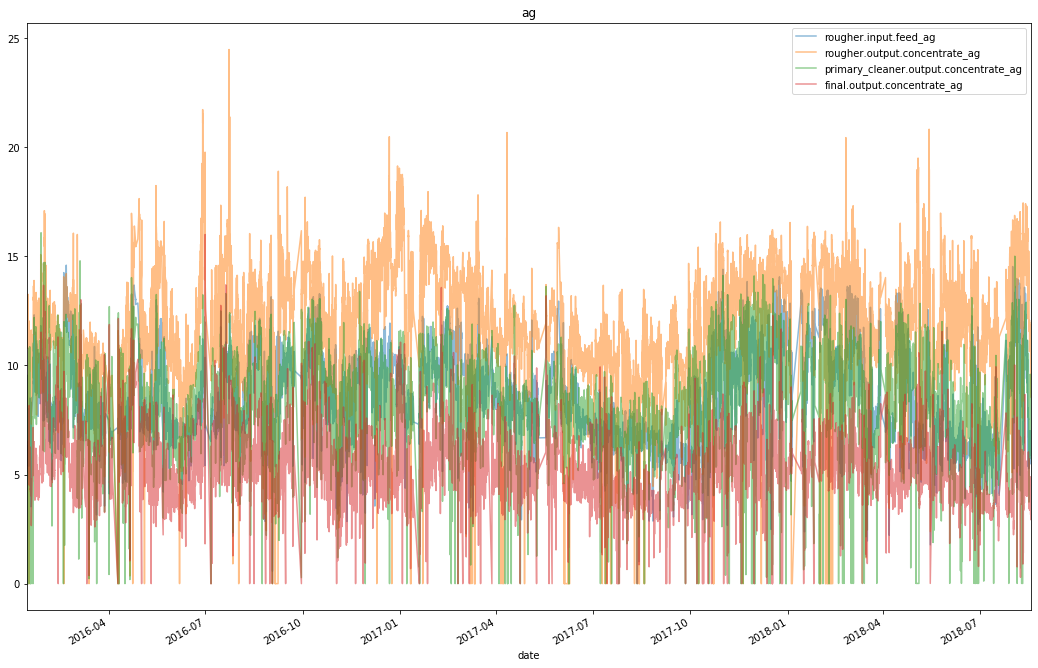

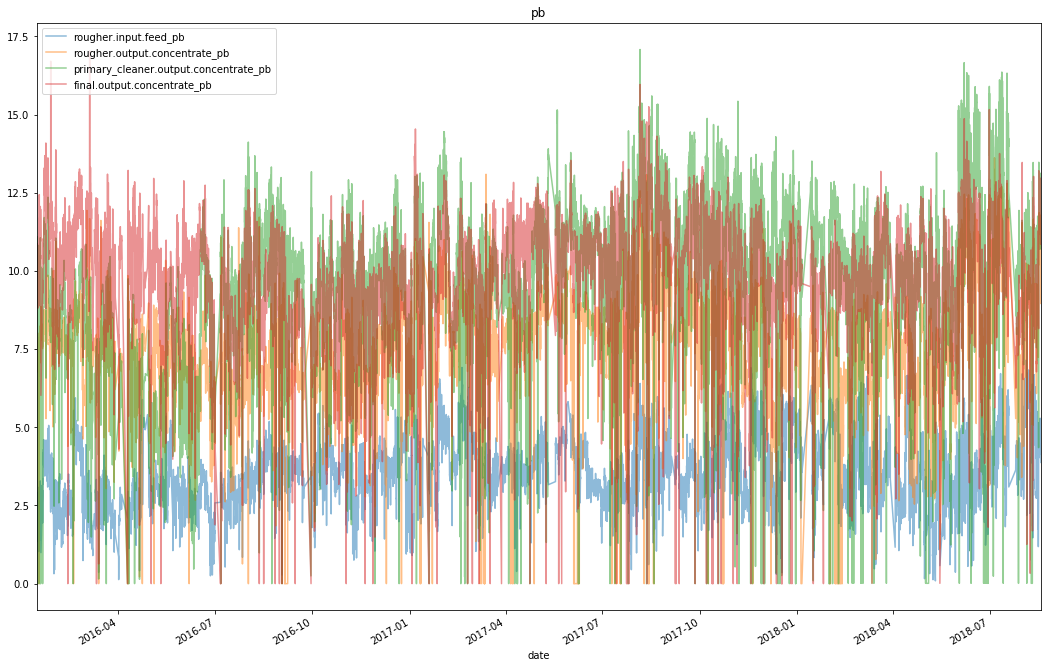

In [29]:
for metal in metals:
    y = list(map(lambda x: x+metal, stages))
    full.plot(x="date", y=y, title=metal, figsize = (18,12),alpha = 0.5)

Концентрация золота после каждой стадии очистки увеличивается.<br>
Серебра после флотации становится больше, но после вторичной очистки уже меньше, чем изначально.<br>
Концентрация свинца после флотации и первичной очистки становится больше, вторичная на его концентрация уже особо не влияет.

### Сравнение распределения размеров гранул сырья

In [30]:
train['rougher.input.feed_size'].describe()

count    14149.000000
mean        60.097903
std         23.023690
min          9.659576
25%         48.950593
50%         55.269784
75%         65.982466
max        484.967466
Name: rougher.input.feed_size, dtype: float64

In [31]:
test['rougher.input.feed_size'].describe()

count    5290.000000
mean       55.952835
std        19.080372
min         0.046369
25%        43.906504
50%        50.846843
75%        62.451165
max       392.494040
Name: rougher.input.feed_size, dtype: float64

Медианы, средние значения, 25 и 75-процентные квантили отличаются несильно.

### Суммарная концентрация

In [32]:
items = ['au','ag','pb','sol']

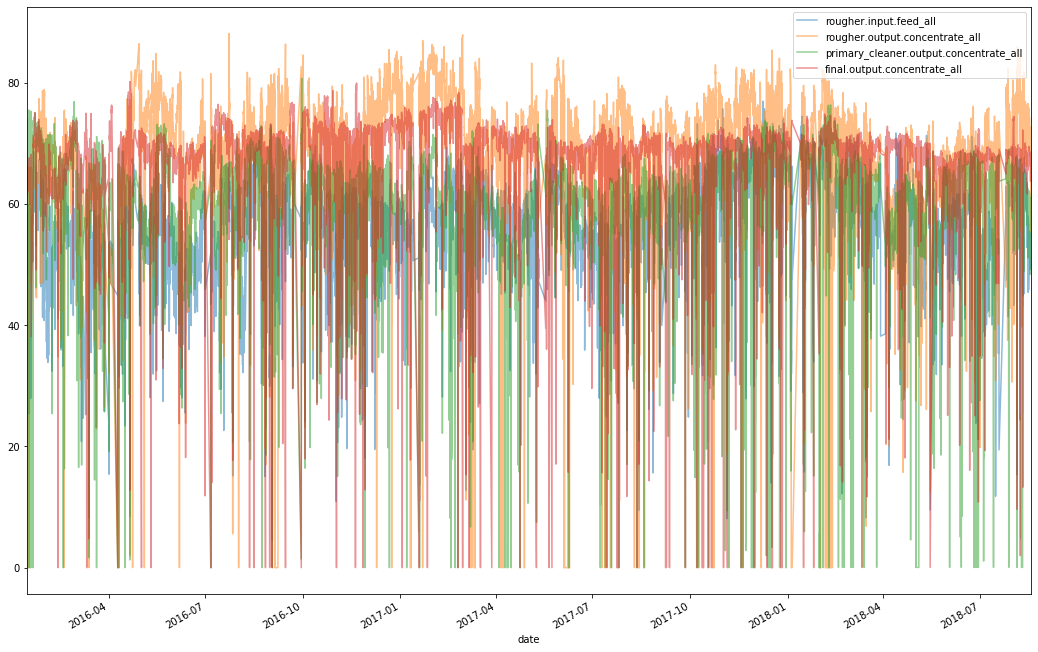

In [33]:
for stage in stages:
    full[stage+'all'] = 0
    for item in items:
        full[stage+'all'] += full[stage+item] 
items = list(map(lambda x: x+'all',stages))
full.plot(x='date', y=items, figsize = (18,12),alpha = 0.5)

Наибольшая концентрация всех веществ достигается после флотации и финальной очистки.
<br>
При этом заметны нулевые суммарные значения. Поскольку это явные ошибки, то строки с нулями лучше убрать.

In [34]:
for stage in stages:
    full = full.drop(full[full[stage+'all'] == 0].index)

Удаление столбцов с суммами и формирование новых таблиц:

In [35]:
full = full.drop([stage+'all' for stage in stages], axis=1)

In [36]:
test = full[full['date'].isin(test['date'])].reset_index(drop=True)
train = full[full['date'].isin(train['date'])].reset_index(drop=True)

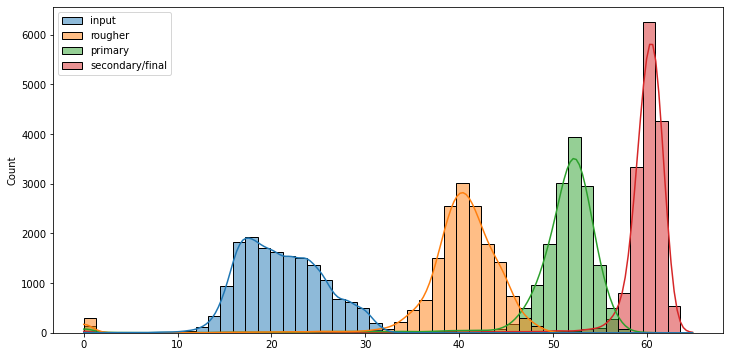

## Модель

Не буду по-серьёзному обсчитывать модели, чтобы это не занимало несколько часов.

### Функция SMAPE и подготовка

In [37]:
def SMAPE(a,b):
    return np.sum(np.abs(a-b) / (np.abs(a) + np.abs(b))*100*2)/len(a)

Удаление ненужных столбцов и даты:

In [38]:
target_list =  ['rougher.output.recovery', 'final.output.recovery']
set_a = set(target_list)
set_b = set(absent+['date'])
drop_list = set_b.difference(set_a)

In [39]:
full = full.drop(drop_list, axis=1)
train = train.drop(drop_list, axis=1)
test = test.drop(drop_list, axis=1)

Разделение выборок:

In [40]:
df_train, df_valid  = train_test_split((train), test_size=1/4, random_state=10001)

scaler = StandardScaler()

features_train = df_train.drop(target_list, axis=1)
target_train_1 = df_train['rougher.output.recovery']
target_train_2 = df_train['final.output.recovery']
features_valid = df_valid.drop(target_list, axis=1)
target_valid_1 = df_valid['rougher.output.recovery']
target_valid_2 = df_valid['final.output.recovery']

features_train = scaler.fit_transform(features_train)
features_valid = scaler.fit_transform(features_valid)

kfold = KFold(n_splits=5, shuffle=True, random_state=9999)

### Линейная регрессия

In [41]:
pipeline_1 = Pipeline([('scaler', StandardScaler()), ('model', LinearRegression())])
pipeline_2 = Pipeline([('scaler', StandardScaler()), ('model', LinearRegression())])

In [42]:
mean_1 = 0
mean_2 = 0

for train_ix, test_ix in kfold.split(train):
    trainx, testx = train.iloc[train_ix], train.iloc[test_ix]
    
    features_trainx, target_trainx_1, target_trainx_2, = trainx.drop(target_list, axis=1), trainx['rougher.output.recovery'], trainx['final.output.recovery']
    features_testx, target_testx_1, target_testx_2, = testx.drop(target_list, axis=1), testx['rougher.output.recovery'], testx['final.output.recovery']
    
    #print(features_testx)
    #print(target_trainx_1)
    
    pipeline_1.fit(features_trainx, target_trainx_1)
    pipeline_2.fit(features_trainx, target_trainx_2)
    
    
    predicted_1 = pipeline_1.predict(features_testx)
    predicted_2 = pipeline_2.predict(features_testx)
    
    score_1 = SMAPE(predicted_1,target_testx_1)
    score_2 = SMAPE(predicted_2,target_testx_2)
    
    mean_1 += score_1   
    mean_2 += score_2
    print(score_1, score_2)
print('среднее значение 1',mean_1/5)
print('среднее значение 2',mean_2/5)

4.571617292454515 7.780309174061936
4.748991460060965 8.217680008867598
4.626828039959187 7.778834899727577
4.755039061203262 8.079076431859095
4.621608384064346 8.58853763286177
среднее значение 1 4.664816847548455
среднее значение 2 8.088887629475597


### Ближайшие соседи

In [43]:
n_neighbors_n = [4,5,6]
weights_n = ['uniform','distance']
leaf_size_n = [25,30,35]

In [44]:
%%time
best_score = 0
for n_neighbors in n_neighbors_n:
    for weights in weights_n:
        for leaf_size in leaf_size_n:
            model = KNeighborsRegressor(n_neighbors = n_neighbors, weights=weights, leaf_size=leaf_size)
            model.fit(features_train,target_train_1)
            prediction = model.predict(features_valid)
            score = SMAPE(target_valid_1,prediction)
            
            if score>best_score:
                best_neighbours = n_neighbors
                best_weights = weights
                best_leaf_size = leaf_size
                best_score = score
print('best_neighbours',best_neighbours)
print('best_weights',best_weights)
print('best_leaf_size',best_leaf_size)
print('best_score',best_score)

best_neighbours 6
best_weights uniform
best_leaf_size 25
best_score 2.6289302475725562
CPU times: user 22.2 s, sys: 0 ns, total: 22.2 s
Wall time: 22.3 s


In [46]:
%%time
best_score = 0
for n_neighbors in n_neighbors_n:
    for weights in weights_n:
        for leaf_size in leaf_size_n:
            model = KNeighborsRegressor(n_neighbors = n_neighbors, weights=weights, leaf_size=leaf_size)
            model.fit(features_train,target_train_2)
            prediction = model.predict(features_valid)
            score = SMAPE(target_valid_2,prediction)
            
            if score>best_score:
                best_neighbours = n_neighbors
                best_weights = weights
                best_leaf_size = leaf_size
                best_score = score
print('best_neighbours',best_neighbours)
print('best_weights',best_weights)
print('best_leaf_size',best_leaf_size)
print('best_score',best_score)

best_neighbours 6
best_weights uniform
best_leaf_size 25
best_score 5.676206907590192
CPU times: user 22.1 s, sys: 0 ns, total: 22.1 s
Wall time: 22.1 s


Кросс-валидация:

In [59]:
pipeline_1 = Pipeline([('scaler', StandardScaler()), ('model', KNeighborsRegressor(n_neighbors = 6, weights='uniform', leaf_size=25))])
pipeline_2 = Pipeline([('scaler', StandardScaler()), ('model', KNeighborsRegressor(n_neighbors = 6, weights='uniform', leaf_size=25))])

In [60]:
mean_1 = 0
mean_2 = 0

for train_ix, test_ix in kfold.split(train):
    trainx, testx = train.iloc[train_ix], train.iloc[test_ix]
    
    features_trainx, target_trainx_1, target_trainx_2, = trainx.drop(target_list, axis=1), trainx['rougher.output.recovery'], trainx['final.output.recovery']
    features_testx, target_testx_1, target_testx_2, = testx.drop(target_list, axis=1), testx['rougher.output.recovery'], testx['final.output.recovery']
    
    pipeline_1.fit(features_trainx, target_trainx_1)
    pipeline_2.fit(features_trainx, target_trainx_2)
    
    
    predicted_1 = pipeline_1.predict(features_testx)
    predicted_2 = pipeline_2.predict(features_testx)
    
    score_1 = SMAPE(predicted_1,target_testx_1)
    score_2 = SMAPE(predicted_2,target_testx_2)
    
    mean_1 += score_1   
    mean_2 += score_2
    print(score_1, score_2)
print('среднее значение 1',mean_1/5)
print('среднее значение 2',mean_2/5)

2.3436916409702895 5.251899779056997
2.554768186545495 5.446173889974434
2.3581268204298915 5.121266828624602
2.5724828342275874 5.621468087669572
2.4659472849525397 5.968407452238822
среднее значение 1 2.4590033534251607
среднее значение 2 5.481843207512886


Ближайшие соседи дают результат лучше линейной модели.

### Случайный лес

In [49]:
n_estimators_n = [x for x in range(60,181,30)]
max_depth_n = [None]#,2,3,4]

In [50]:
%%time
best_score = 0
for y in n_estimators_n:
    for z in max_depth_n:
        model = RandomForestRegressor(random_state=10000,n_estimators = y, max_depth = z)
        model.fit(features_train,target_train_1)
        prediction = model.predict(features_valid)
        score = SMAPE(target_valid_1,prediction)
        if score > best_score:
            best_score = score
            best_n_estimators = y
            best_max_depth = z
    print(y)

print('Best n_estimators:',best_n_estimators)
print('Best max_depth:',best_max_depth)
print('best_score',best_score)

60
90
120
150
180
Best n_estimators: 60
Best max_depth: None
best_score 3.176988096527442
CPU times: user 3min 42s, sys: 107 ms, total: 3min 42s
Wall time: 3min 43s


In [51]:
%%time
best_score = 0
for y in n_estimators_n:
    for z in max_depth_n:
        model = RandomForestRegressor(random_state=10000,n_estimators = y, max_depth = z)
        model.fit(features_train,target_train_2)
        prediction = model.predict(features_valid)
        score = SMAPE(target_valid_2,prediction)
        if score > best_score:
            best_score = score
            best_n_estimators = y
            best_max_depth = z
    print(y)

print('Best n_estimators:',best_n_estimators)
print('Best max_depth:',best_max_depth)
print('best_score',best_score)

60
90
120
150
180
Best n_estimators: 60
Best max_depth: None
best_score 6.166808846520559
CPU times: user 4min 25s, sys: 70.9 ms, total: 4min 25s
Wall time: 4min 30s


In [52]:
pipeline_1 = Pipeline([('scaler', StandardScaler()), ('model', RandomForestRegressor(random_state=10000,n_estimators = 60))])
pipeline_2 = Pipeline([('scaler', StandardScaler()), ('model', RandomForestRegressor(random_state=10000,n_estimators = 60))])

In [53]:
mean_1 = 0
mean_2 = 0

for train_ix, test_ix in kfold.split(train):
    trainx, testx = train.iloc[train_ix], train.iloc[test_ix]
    
    features_trainx, target_trainx_1, target_trainx_2, = trainx.drop(target_list, axis=1), trainx['rougher.output.recovery'], trainx['final.output.recovery']
    features_testx, target_testx_1, target_testx_2, = testx.drop(target_list, axis=1), testx['rougher.output.recovery'], testx['final.output.recovery']
    
    pipeline_1.fit(features_trainx, target_trainx_1)
    pipeline_2.fit(features_trainx, target_trainx_2)
    
    
    predicted_1 = pipeline_1.predict(features_testx)
    predicted_2 = pipeline_2.predict(features_testx)
    
    score_1 = SMAPE(predicted_1,target_testx_1)
    score_2 = SMAPE(predicted_2,target_testx_2)
    
    mean_1 += score_1   
    mean_2 += score_2
    print(score_1, score_2)
print('среднее значение 1',mean_1/5)
print('среднее значение 2',mean_2/5)

2.4624712367735544 5.596798380012898
2.615089457749025 5.817216124078973
2.509623604833993 5.460670471087824
2.6410632326434316 5.695062302099653
2.636760353411093 6.143967384382875
среднее значение 1 2.5730015770822194
среднее значение 2 5.742742932332445


### Проверка на тестовой выборке

Лучший результат показала модель ближайший соседей.

In [54]:
pipeline_1 = Pipeline([('scaler', StandardScaler()), ('model', KNeighborsRegressor(n_neighbors = 6, weights='uniform', leaf_size=25))])
pipeline_2 = Pipeline([('scaler', StandardScaler()), ('model', KNeighborsRegressor(n_neighbors = 6, weights='uniform', leaf_size=25))])

In [68]:
full_features_train = train.drop(target_list, axis=1)
full_target_train_1 = train['rougher.output.recovery']
full_target_train_2 = train['final.output.recovery']

full_features_test = test.drop(target_list, axis=1)
full_target_test_1 = test['rougher.output.recovery']
full_target_test_2 = test['final.output.recovery']

In [56]:
pipeline_1.fit(full_features_train, full_target_train_1)
pipeline_2.fit(full_features_train, full_target_train_2)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 KNeighborsRegressor(algorithm='auto', leaf_size=25,
                                     metric='minkowski', metric_params=None,
                                     n_jobs=None, n_neighbors=4, p=2,
                                     weights='uniform'))],
         verbose=False)

In [57]:
pipeline_1.fit(full_features_train, full_target_train_1)
pipeline_2.fit(full_features_train, full_target_train_2)
    
    
predicted_1 = pipeline_1.predict(full_features_test)
predicted_2 = pipeline_2.predict(full_features_test)
    
score_1 = SMAPE(predicted_1,full_target_test_1)
score_2 = SMAPE(predicted_2,full_target_test_2)
total_score = 0.25*score_1+0.75*score_2
print('score_1',score_1)
print('score_2',score_2)
print('total_score',total_score)

score_1 4.92804146982749
score_2 8.66776269267471
total_score 7.732832386962905


На тестовой выборке модель показала себя хуже.

### Оценка модели

Для сравнения будет использована глупые модели со средними искомых значений.

In [65]:
dummy_1 = DummyRegressor()
dummy_2 = DummyRegressor()

In [70]:
dummy_1.fit(full_features_train, full_target_train_1)
dummy_2.fit(full_features_train, full_target_train_2)
    
    
predicted_1 = dummy_1.predict(full_features_test)
predicted_2 = dummy_2.predict(full_features_test)
    
score_1 = SMAPE(predicted_1,full_target_test_1)
score_2 = SMAPE(predicted_2,full_target_test_2)
total_score = 0.25*score_1+0.75*score_2
print('score_1',score_1)
print('score_2',score_2)
print('total_score',total_score)

score_1 5.364780952068202
score_2 8.58252552273144
total_score 7.778089380065631


Модель можно использовать только для оценки контцентрации после флотации, но не итоговой.

### Итоговая модель

In [72]:
pipeline_1.fit(full_features_train, full_target_train_1)
dummy_2.fit(full_features_train, full_target_train_2)
    
    
predicted_1 = pipeline_1.predict(full_features_test)
predicted_2 = dummy_2.predict(full_features_test)
    
score_1 = SMAPE(predicted_1,full_target_test_1)
score_2 = SMAPE(predicted_2,full_target_test_2)
total_score = 0.25*score_1+0.75*score_2
print('score_1',score_1)
print('score_2',score_2)
print('total_score',total_score)

score_1 4.92804146982749
score_2 8.58252552273144
total_score 7.668904509505453


In [73]:
final_features_train = full.drop(target_list, axis=1)
final_target_train_1 = full['rougher.output.recovery']
final_target_train_2 = full['final.output.recovery']

pipeline_1.fit(final_features_train, final_target_train_1)
dummy_2.fit(final_features_train, final_target_train_2)

DummyRegressor(constant=None, quantile=None, strategy='mean')

## Вывод

Данные были проанализированы, пропуски были заполнены линейной интерполяцией, исследованы изменения концентраций металлов на разных стадиях.
<br>
<br>
Были обучены и проверены по три мадели на искомые параметры, лучше всего себя показала модель ближайших соседей.
<br>
Однако после сравнения с глупой моделью, использующей средние значения, итоговая может быть использована только для рассчёта концентрации золота после флотации, но не для итогового значения после полного цикла очистки. Вероятно, что технологический процесс просто не может дать большей концентрации золота из используемой породы, поэтому выгоднее использовать среднее значение для предсказаний.